# Case Study
<p>Buat program python dengan VSM secara berkelompok. Buat sebuah korpus terlebih dahulu. Korpus boleh dari twitter, news, ataupun yang lain.

<p>Buat laporan hasil program dengan menentukan 5 kueri.

Dipresentasikan di pertemuan 11

 Korpus dari twitter tentang G20 Indonesia
* NLTK library for :
> Stemming English use Algo Porter <br>
> Stopwords english and Indonesia 
<br>
* Sastrawing for :     
> for stemming Indonesia text


In [101]:
# Install Library sastrawi
!pip install Sastrawi

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [102]:
import pandas as pd

# Get data

In [103]:
df_G20_non_hash=pd.read_csv("/content/dataset_twitter-scraper_G20.csv")
df_G20_hash=pd.read_csv("/content/dataset_twitter-scraper_G20_hash.csv")

In [104]:
df_G20_non_hash.head()

,conversation_id,created_at,favorite_count,full_text,hashtags/0,hashtags/1,hashtags/2,hashtags/3,hashtags/4,hashtags/5,...,user_mentions/0/screen_name,user_mentions/1/id_str,user_mentions/1/name,user_mentions/1/screen_name,user_mentions/2/id_str,user_mentions/2/name,user_mentions/2/screen_name,user_mentions/3/id_str,user_mentions/3/name,user_mentions/3/screen_name
0,1591778555083755520,2022-11-13T13:02:36.000Z,618,One Earth. One FAMILY. ONE Future !! \n\n#G20 ...,G20,G20India,G20Indonesia,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1591802671580995588,2022-11-13T14:38:25.000Z,929,"The G20 delegation has arrived in Bali, they r...",WonderfulIndonesia,G20Indonesia,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1592038936142295040,2022-11-14T06:17:15.000Z,59,"Tomorrow, the 2022 G20 Bali Summit will be hel...",G20Indonesia,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1592152351116333056,2022-11-14T13:47:55.000Z,1123,President Kagame joined President @Macky_Sall ...,G20Indonesia,NaN,NaN,NaN,NaN,NaN,...,Macky_Sall,2.987156e+09,Cyril Ramaphosa 🇿🇦,CyrilRamaphosa,149991703.0,Alberto Fernández,alferdez,1.976143e+09,Emmanuel Macron,EmmanuelMacron
4,1592254645853995010,2022-11-14T20:34:24.000Z,39,What did I just watch???? #XiJinping #BidenXiM...,XiJinping,BidenXiMeeting,G20Indonesia,G20BaliSummit,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [105]:
df_G20_hash.head()

,conversation_id,created_at,favorite_count,full_text,hashtags/0,hashtags/1,hashtags/2,hashtags/3,hashtags/4,hashtags/5,...,user/url,user/utc_offset,user/verified,user/want_retweets,user_mentions/0/id_str,user_mentions/0/name,user_mentions/0/screen_name,user_mentions/1/id_str,user_mentions/1/name,user_mentions/1/screen_name
0,1528684321254608896,2022-05-23T10:28:38.000Z,182022,Elon musk has changed Twitter like button from...,NaN,NaN,NaN,NaN,NaN,NaN,...,https://t.co/2cZkKNvlDx,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1592060213615812608,2022-11-14T07:41:48.000Z,1029,During the #G20Indonesia Indonesian 🇮🇩 Preside...,G20Indonesia,G20,G20India,NaN,NaN,NaN,...,https://t.co/DyRSJYDSzQ,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1592310386954731520,2022-11-15T00:15:54.000Z,324,📸 Here're group photos of #Fellas at various s...,Fellas,Bali,G20Indonesia,NAFOexpansion,NAFO,NAFOFellas,...,NaN,NaN,False,NaN,1.454347e+18,Vasyl Hamianin,VHamianin,NaN,NaN,NaN
3,1592313811121602561,2022-11-15T00:29:30.000Z,1350,Hari ini Indonesia jadi perhatian Dunia\n\nAda...,G20Indonesia,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1592323692775833601,2022-11-15T02:08:41.000Z,59,France's Emmanuel Macron met with Xi Jinping o...,G20Indonesia2022,G20Indonesia,NaN,NaN,NaN,NaN,...,https://t.co/IH4P72QDIe,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Cleaning data

Concat dua data
> karena memakai API dari apify dilakukan pencarian korpus berdasar
hashtag dan tidak menggunakan hashtag agar korpus semakin banyak

In [106]:
df_G20_hash["full_text"],df_G20_non_hash["full_text"]

(0     Elon musk has changed Twitter like button from...
 1     During the #G20Indonesia Indonesian 🇮🇩 Preside...
 2     📸 Here're group photos of #Fellas at various s...
 3     Hari ini Indonesia jadi perhatian Dunia\n\nAda...
 4     France's Emmanuel Macron met with Xi Jinping o...
 5     Brown vintage dress ideas✨\n\n— a thread\n\nBa...
 6     🇮🇩G20 Indonesia 2022🇮🇩\n#hetalia #hwsindonesia...
 7     PM @narendramodi meet French 🇫🇷 President Emma...
 8     Hon'ble PM Shri @narendramodi Ji attends the #...
 9     Today in Bali, President Kagame attends the op...
 10    Watch Prime Minister @narendramodi and US Pres...
 11    President Xi Jinping at the G20 official welco...
 12    PM @narendramodi interacted with President Mac...
 13    Prime Ministers @narendramodi and Netherlands ...
 14    Together we are taking action.\n \nProductive ...
 15    ‘I’m having trouble reading this :#LostBiden i...
 16    President Kagame and Indonesian President Joko...
 17    dark-tone shoes reccomme

In [107]:
df_G20_hash["full_text"][0]

'Elon musk has changed Twitter like button from ❤️ to 💙 https://t.co/RJueV7OHyS'

dapat dilihat bahwa ada text elon musk yang tidak relevan terhadap berita G20 

## Gabungkan data terlebih dahulu

In [108]:
df_1=df_G20_hash["full_text"]
df_2=df_G20_non_hash["full_text"]

In [109]:
df_G20_=pd.concat([df_1, df_2], ignore_index=True)

In [110]:
df_G20_=pd.DataFrame({
    "full_text":df_G20_
}) # Simpan data yang sudah yang dsimpan kedalam dataframe

In [111]:
df_G20_.head()

,full_text
0,Elon musk has changed Twitter like button from...
1,During the #G20Indonesia Indonesian 🇮🇩 Preside...
2,📸 Here're group photos of #Fellas at various s...
3,Hari ini Indonesia jadi perhatian Dunia\n\nAda...
4,France's Emmanuel Macron met with Xi Jinping o...


## Bersihkan data tidak relevan terhadap berita G20

Melihat masing-masing data yang benar-benar relevan ke berita G20

In [112]:
df_G20_news_only=df_G20_["full_text"].map(lambda news : "G20" in news) # Gunakan fungsi map untuk perulangan agar hanya melihat korpus text yang mengandung kata  "G20"

In [113]:
df=df_G20_[df_G20_news_only]

In [114]:
df["full_text"]

1     During the #G20Indonesia Indonesian 🇮🇩 Preside...
2     📸 Here're group photos of #Fellas at various s...
3     Hari ini Indonesia jadi perhatian Dunia\n\nAda...
4     France's Emmanuel Macron met with Xi Jinping o...
6     🇮🇩G20 Indonesia 2022🇮🇩\n#hetalia #hwsindonesia...
7     PM @narendramodi meet French 🇫🇷 President Emma...
8     Hon'ble PM Shri @narendramodi Ji attends the #...
9     Today in Bali, President Kagame attends the op...
10    Watch Prime Minister @narendramodi and US Pres...
11    President Xi Jinping at the G20 official welco...
12    PM @narendramodi interacted with President Mac...
13    Prime Ministers @narendramodi and Netherlands ...
14    Together we are taking action.\n \nProductive ...
15    ‘I’m having trouble reading this :#LostBiden i...
16    President Kagame and Indonesian President Joko...
17    dark-tone shoes reccommendation 🖤\n\n—thread\n...
18    The US-India partnership 🇺🇸 🇮🇳\n\n@POTUS @nare...
19    President Kagame attends #G20Indonesia. ht

In [115]:
df.head()

,full_text
1,During the #G20Indonesia Indonesian 🇮🇩 Preside...
2,📸 Here're group photos of #Fellas at various s...
3,Hari ini Indonesia jadi perhatian Dunia\n\nAda...
4,France's Emmanuel Macron met with Xi Jinping o...
6,🇮🇩G20 Indonesia 2022🇮🇩\n#hetalia #hwsindonesia...


# Exploration text data

## Melihat berapa stopwords di data text

In [116]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [117]:
stop_en=stopwords.words('english')
stop_id=stopwords.words('indonesian')

In [118]:
import matplotlib.pyplot as plt
#code from https://app.neptune.ai/neptune-ai/eda-nlp-tools/n/1-3-top-stopwords-barchart-b953763c-3fea-4331-bff0-429411793e5f/5c0fca05-ba07-4564-a02e-c44b08bfb8cb
def plot_top_stopwords_barchart(text):
    stop=stop_en+stop_id
    
    new= text.str.split()
    new=new.values.tolist()
    corpus=[word for i in new for word in i]
    from collections import defaultdict
    dic=defaultdict(int)
    for word in corpus:
        if word in stop:
            dic[word]+=1
    top=sorted(dic.items(), key=lambda x:x[1],reverse=True)[:10] 
    x,y=zip(*top)
    plt.figure(figsize=(15,10))
    plt.bar(x,y)
    plt.title("10 Stopwords yang sering muncul ")

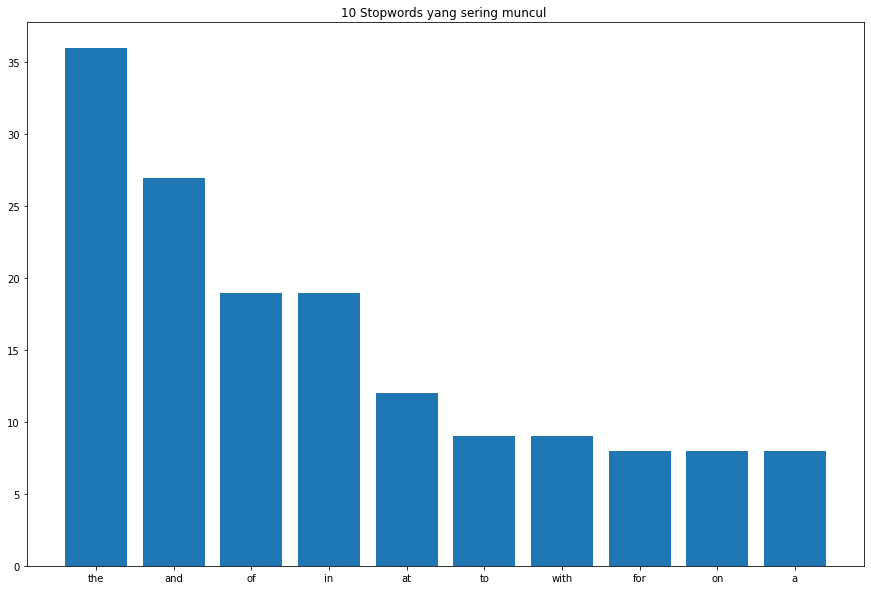

In [119]:
plot_top_stopwords_barchart(df["full_text"])

# Preprocessing text
> Remove Stopwords

> Stemming

> Case folding

## Casefolding

In [120]:
import re

In [121]:
def caseFolding(text):
  text=text.lower()
  text=re.sub(r"[^a-zA-Z]"," ",text) # Menghapus tanda baca dan angka
  text=re.sub(r"https?://\S|www\.\S|t.co?\S"," ",text) # Menghapus url
  text=re.sub("#\S*\s", "", text)
  text=re.sub("W+", "", text)
  text=re.sub("@\S*\s", "", text)
  text=re.sub("http\S*\s", "", text)
  text = re.sub(r'^https?:\/\/.*[\r\n]*', '', text, flags=re.MULTILINE)  
  '''
   Logic nya adalah 
   jika terdapat kata https maka hapus 
   jika https?: maka jika ada kata atau text sesudah https maka dihapus 
   jika S+ maka 
  '''
  
  return text

In [122]:
raw_text=df["full_text"][1]
print("Data mentah :",raw_text)
print(f'\nData Case folding : {caseFolding(raw_text)}')

Data mentah : During the #G20Indonesia Indonesian 🇮🇩 President Joko Widodo will symbolically hand over the G20 presidency to Prime Minister at the closing session of the summit in Bali.

#G20  #G20India https://t.co/HFCfSWVvXS

Data Case folding : during the  g  indonesia indonesian    president joko widodo will symbolically hand over the g   presidency to prime minister at the closing session of the summit in bali    g     g  india     hfcfswvvxs


In [123]:
caseFolding(raw_text)

'during the  g  indonesia indonesian    president joko widodo will symbolically hand over the g   presidency to prime minister at the closing session of the summit in bali    g     g  india     hfcfswvvxs'

## Remove stopwords

In [124]:
stop_en=stopwords.words('english')
stop_id=stopwords.words('indonesian')

In [125]:
more_stopwords=["https" ,"bg" ,"dkagvsq","yg","yvmc","also","zxz",
                "xee","rjjz","hfcfswvvx","http","qnxuis","rhmnv",
                "yacnl","wmrqqb","tjlmcdsino","hfcfswvvxs","g","iyx",
                "ftsjbw","whbklh","xcz","xcrsjv","qmgq",
                "xycfjegna","hh","jwxx","myheefkhi","omzgkrxbch","tdtoxpj","ofmzxuz","mziwlpvvu","omzgkrxbch","fwgqcwgtwb"]

In [126]:
def flatten(l):
    """
    Same as 
    flat_list = []
    for sublist in l:
    for item in sublist:
        flat_list.append(item)

    Example =[[1,2,3,4,5]] - > [1,2,3,4,5]
    """
    return " ".join([item for sublist in l for item in sublist])
    
def remove_stop_words(text):
  stp=stop_en+stop_id+more_stopwords
  clean_words = []
  text=text.split()
  perulangan_text=[word for word in text if word not in stp]
  clean_words.append(perulangan_text)
  return flatten(clean_words)

In [127]:
stp=stop_en+stop_id+more_stopwords

In [128]:
print(f'Stopwords remove: {remove_stop_words(caseFolding(raw_text))}')

Stopwords remove: indonesia indonesian president joko widodo symbolically hand presidency prime minister closing session summit bali india


## Stemming

In [129]:
from nltk.stem.porter import PorterStemmer # Stemming untuk teks bahasa inggris
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory # Stemming untuk teks bahasa Indonesia

In [130]:
stem_en=PorterStemmer()
fact_stem_id=StemmerFactory()
stem_id=fact_stem_id.create_stemmer()

In [131]:
def stemsWords(text):
  text_en=stem_en.stem(text)
  text_id=stem_id.stem(text_en)
  return text_id

In [132]:
stemsWords(remove_stop_words(caseFolding(raw_text)))

'indonesia indonesian president joko widodo symbolically hand presidency prime mister closing session summit bal india'

## Word normalization

In [133]:
# Buat korpus bank 
korpus_word_normal={
    "kata":["rusia"],
    "perbaikan":["russia"]
}
key_norm=pd.DataFrame(korpus_word_normal)

In [134]:
key_norm

,kata,perbaikan
0,rusia,russia


In [135]:
def text_normalize(text):
  text = ' '.join([key_norm[key_norm['kata'] == word]['perbaikan'].values[0] if (key_norm['kata'] == word).any() else word for word in text.split()])
  text = str.lower(text)
  return text

## Text preprocessing pipeline

In [136]:
def text_preprocessing_process(text):
  text = caseFolding(text)
  text = remove_stop_words(text)
  text = stemsWords(text)
  text=text_normalize(text)
  return text

In [137]:
df["clean text"]=df["full_text"].apply(text_preprocessing_process)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [138]:
df

,full_text,clean text
1,During the #G20Indonesia Indonesian 🇮🇩 Preside...,indonesia indonesian president joko widodo sym...
2,📸 Here're group photos of #Fellas at various s...,group photos fellas various spots bal commemor...
3,Hari ini Indonesia jadi perhatian Dunia\n\nAda...,indonesia perhati dunia presiden latar tukang ...
4,France's Emmanuel Macron met with Xi Jinping o...,france emmanuel macron met xi jinping sideline...
6,🇮🇩G20 Indonesia 2022🇮🇩\n#hetalia #hwsindonesia...,indonesia hetalia hwsindonesia indonesia c
7,PM @narendramodi meet French 🇫🇷 President Emma...,pm narendramodi meet french president emmanuel...
8,Hon'ble PM Shri @narendramodi Ji attends the #...,hon ble pm shri narendramodi ji attends indone...
9,"Today in Bali, President Kagame attends the op...",today bal president kagame attends opening ind...
10,Watch Prime Minister @narendramodi and US Pres...,watch prime mister narendramodi us president j...
11,President Xi Jinping at the G20 official welco...,president xi jinping official welcome presiden...


In [139]:
df["clean text"][38]

'president kagame indonesian president joko widodo chair ride together discuss future bilateral cooperation including strengthening diplomatic relations rwanda indonesia indonesia'

In [140]:
df["full_text"][38]

'President Kagame and Indonesian President Joko Widodo who is also the Chair of #G20 ride together as they discuss the future of bilateral cooperation including strengthening diplomatic relations between Rwanda and Indonesia.#G20Indonesia https://t.co/BG9dKAgvsQ'

# Buat VSM
> Lakukan Countvectorizer <br>
 Melihat banyak kata yang muncul dalam setiap dokumen <br>

> Lakukan TfIdf

## Lakukan Countvectorizer

In [141]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()

In [142]:
korpus=df["clean text"]

In [143]:
X = vectorizer.fit_transform(korpus)

In [144]:
vectorizer.get_feature_names_out()

array(['action', 'address', 'addressing', 'affordable', 'africa',
       'african', 'al', 'alferdez', 'ambassador', 'amp', 'arab', 'arabia',
       'arah', 'archi', 'argentina', 'arrived', 'ast', 'attends', 'au',
       'bal', 'balisummit', 'basic', 'bca', 'beautiful', 'biden',
       'bidenximeeting', 'bilateral', 'bin', 'birthday', 'ble', 'bo',
       'bornpinkjakarta', 'brown', 'bua', 'build', 'business', 'calling',
       'cat', 'chair', 'chairman', 'chairperson', 'challenges', 'china',
       'cina', 'closing', 'coldplay', 'commemorating', 'commitment',
       'cooperate', 'cooperation', 'country', 'cp', 'crown', 'cultural',
       'current', 'currently', 'cyrilramaphosa', 'dark', 'delegation',
       'digital', 'dinner', 'diplomatic', 'discuss', 'discusses', 'dll',
       'dn', 'dorong', 'dress', 'dunia', 'dx', 'earth', 'economic',
       'efforts', 'ekonomi', 'emmanuel', 'emmanuelmacron', 'enable',
       'enchantedtomeetjake', 'energy', 'environment', 'exchange',
       'family

In [145]:
korpus_unigram=X.toarray()
data_unigram = pd.DataFrame(korpus_unigram, columns=vectorizer.get_feature_names_out())
data_unigram

,action,address,addressing,affordable,africa,african,al,alferdez,ambassador,amp,...,wisnu,wmrqqb,wnm,wonderfulindonesia,working,world,wts,xi,xijinping,zayed
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,2,0,0


## Lakukan TFidF

In [146]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()

In [147]:
korpus=vectorizer.fit_transform(korpus)

In [148]:
korpus_unigram=korpus.toarray()
data_unigram = pd.DataFrame(korpus_unigram, columns=vectorizer.get_feature_names_out())
data_unigram

,action,address,addressing,affordable,africa,african,al,alferdez,ambassador,amp,...,wisnu,wmrqqb,wnm,wonderfulindonesia,working,world,wts,xi,xijinping,zayed
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.224623,0.224623,...,0.00000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.000000,0.204319,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.204319,0.000000,0.000000
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
6,0.000000,0.000000,0.000000,0.191068,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.00000,0.000000,0.191068,0.000000,0.000000,0.000000,0.000000,0.000000
7,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
8,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.299731,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
9,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.424594,0.000000,0.000000


tugasnya
1. melihat teks yang udah dilakukan tfidf 
2. cari teks yang udah dilakukan pre-processing dan sebelum di preprocessing
bandingkan, siapa tau ada kata yang kudu di normalisasi 